<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_10_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB Assignment 9**

### <font color='blue'> Task - 1 [Marks 0] </font>:
Load and preprocess the UCI [Vehicle silhouettes](https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes) - there are 18 features in this dataset

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_vehicle_silhouettes = fetch_ucirepo(id=149)

# data (as pandas dataframes)
X = statlog_vehicle_silhouettes.data.features
y = statlog_vehicle_silhouettes.data.targets

# metadata
print(statlog_vehicle_silhouettes.metadata)

# variable information
print(statlog_vehicle_silhouettes.variables)


{'uci_id': 149, 'name': 'Statlog (Vehicle Silhouettes)', 'repository_url': 'https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes', 'data_url': 'https://archive.ics.uci.edu/static/public/149/data.csv', 'abstract': '3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 946, 'num_features': 18, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C5HG6N', 'creators': ['Pete Mowforth', 'Barry Shepherd'], 'intro_paper': {'ID': 393, 'type': 'NATIVE', 'title': 'Vehicle Recognition Using Rule Based Methods', 'authors': 'J. Siebert', 'venue': 'Turing Institute', 'year': 1987, 'journal': None, 'DOI': None, 'URL': 'https:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv('https://archive.ics.uci.edu/static/public/149/data.csv')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       845 non-null    float64
 1   CIRCULARITY                       846 non-null    int64  
 2   DISTANCE CIRCULARITY              846 non-null    int64  
 3   RADIUS RATIO                      846 non-null    int64  
 4   PR.AXIS ASPECT RATIO              846 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           846 non-null    int64  
 6   SCATTER RATIO                     846 non-null    int64  
 7   ELONGATEDNESS                     846 non-null    int64  
 8   PR.AXIS RECTANGULARITY            846 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         846 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  846 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  846 non-null    int64  
 12  SCALED R

In [7]:
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,class
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


### <font color='blue'> Task - 2 [Marks 1] </font>:

1. Check for duplicate and missing features and handle such cases as necessary.  

2. Partition the data into training, and test sets (80%-20%).  

In [9]:
# check for duplicates
no_of_duplicates = dataset.duplicated().sum()
print(f'Number of duplicates: {no_of_duplicates}')
# as there are zero duplicates so no need to handle it

Number of duplicates: 0


In [15]:
#check for missing value
missing_values = dataset.isnull().sum()
print(f'Number of missing values: {missing_values.sum()}')


Number of missing values: 0


In [16]:
# as there are 1 missing values so there is need to handle it
dataset = dataset.dropna()

In [19]:
X = dataset.drop('class', axis=1)
Y = dataset['class']

# Partition the data into training and test sets (80%-20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### <font color='blue'> Task - 3 [Marks 5] </font>:

1. Perform HAC from scratch using Euclidean distance and average linkage on the training set.  

2. Derive 4 clusters from the from your implementation of HAC and assign all points to their closest clusters.  

In [32]:
# Calculate Euclidean distance
def cal_euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


# Calculate Average Linkage
def cal_avg_linkage(cluster1, cluster2, data):
  dist = []
  for i in cluster1:
    for j in cluster2:
      dist.append(cal_euclidean_dist(data[i], data[j]))
  return np.mean(dist)


# Perform HAC from scratch using Euclidean distance and average linkage
def hierarchical_agglomerative_clustering(data, no_of_clusters):
  no_of_samples = data.shape[0]
  clusters = []

  for i in range(no_of_samples):
    clusters.append([i])

  while len(clusters) > no_of_clusters:
    minimum_dist = float('inf')
    first_closest_cluster_index, second_closest_cluster_index = -1, -1

    #search for two closest cluster
    for idx in range(len(clusters)):
      for jdx in range(idx+1, len(clusters)):
        dist = cal_avg_linkage(clusters[idx], clusters[jdx], data)
        if dist < minimum_dist:
          minimum_dist = dist
          first_closest_cluster_index = idx
          second_closest_cluster_index = jdx

    # merge the two closest cluster
    clusters[first_closest_cluster_index].extend(clusters[second_closest_cluster_index])

    del clusters[second_closest_cluster_index]

    # Assign cluster labels to each
    cluster_labels = np.zeros(no_of_samples, dtype=int)
    for clstr_idx, clstr in enumerate(clusters):
      for data_idx in clstr:
        cluster_labels[data_idx] = clstr_idx

  return cluster_labels, linkage_matrix



# Run HAC on the training data
scratch_labels = hierarchical_agglomerative_clustering(X_train.values, no_of_clusters=4)

### <font color='blue'> Task - 4 [Marks 4] </font>:

Perform clustering using sklearn’s implementation with the same hyperparameters.

In [33]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

sklearn_model = AgglomerativeClustering(n_clusters=4, linkage='average')

sklearn_labels = sklearn_model.fit_predict(X_train)

# Calculate linkage matrices
sklearn_linkage_matrix = linkage(X_train, method='average', metric='euclidean')

### <font color='blue'> Task - 5 [Marks 2] </font>:

Show the corresponding dendogram.  

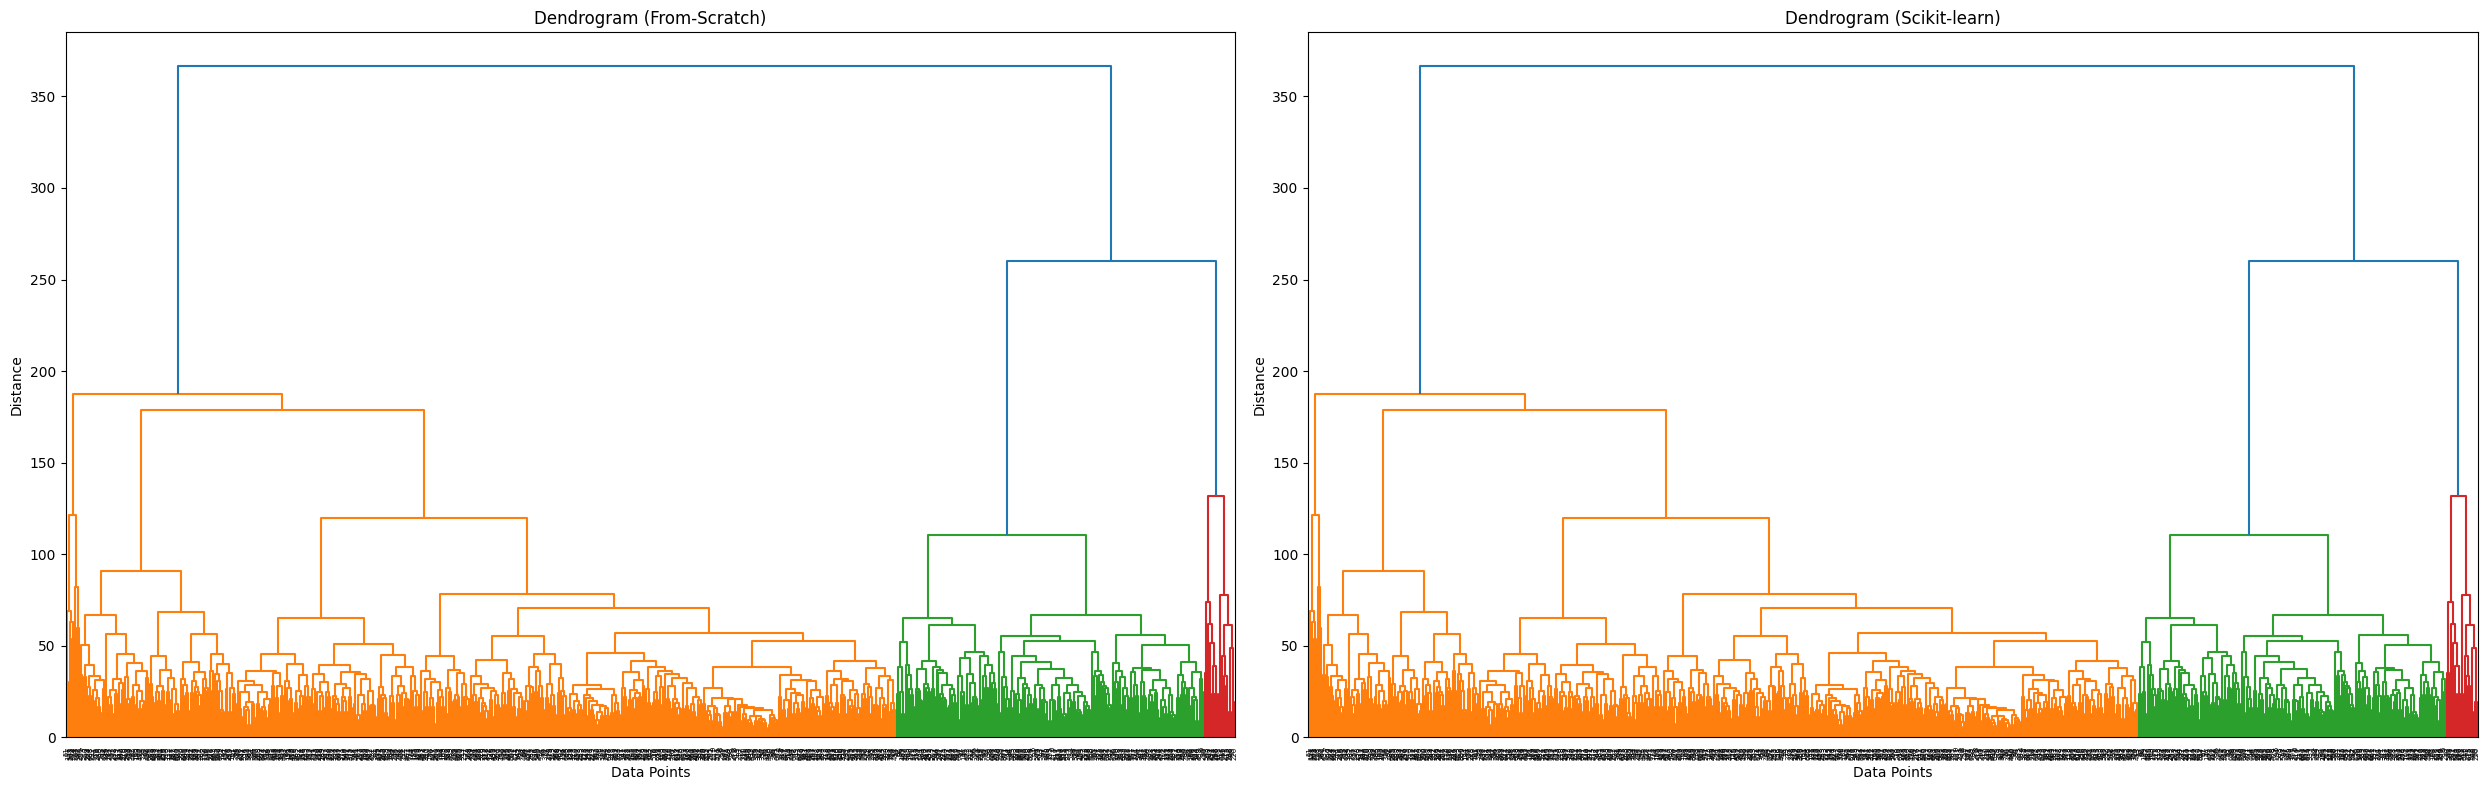

In [36]:
# Calculate linkage matrices
sklearn_linkage_matrix = linkage(X_train, method='average', metric='euclidean')
scratch_linkage_matrix = linkage(X_train, method='average', metric='euclidean')
# Create subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

# show dendrogram for from-scratch implementation
dendrogram(np.array(scratch_linkage_matrix), ax=ax1)
ax1.set_title('Dendrogram (From-Scratch)')
ax1.set_xlabel('Data Points')
ax1.set_ylabel('Distance')

# show dendrogram for scikit-learn implementation
dendrogram(sklearn_linkage_matrix, ax=ax2)
ax2.set_title('Dendrogram (Scikit-learn)')
ax2.set_xlabel('Data Points')
ax2.set_ylabel('Distance')

plt.tight_layout()
plt.show()

### <font color='blue'> Task - 6 [Marks 4] </font>:

For both the from scratch and sklearn implementation, rename the labels consistently such that the label for the clusters having the smallest to largest centroids are assigned labels ‘0’ to ‘3’ (this is because label names in from scratch implementation and scikit-learn implementation may not be consistent).  

In [37]:
def cal_centroids(data, cluster_labels, no_of_clusters):
  centroids = [np.mean(data[cluster_labels == i], axis=0) for i in range(no_of_clusters)]
  return centroids



def rename_cluster_labels(data, cluster_labels, no_of_clusters):
  centroids = cal_centroids(data, cluster_labels, no_of_clusters)
  # Calculate the sum of each centroid
  centroid_sums = [np.sum(centroid) for centroid in centroids]

  # Get the indices that would sort the sums in ascending order
  sorted_idx = np.argsort(centroid_sums)

  # Initialize an empty dictionary to hold the label mappings
  label_map = {}

  # Iterate over the sorted indices to populate the mapping
  for new_label, original_label in enumerate(sorted_idx):
    label_map[original_label] = new_label

  return np.vectorize(label_map.get)(cluster_labels)



# Rename cluster labels
scratch_labels_renamed = rename_cluster_labels(X_train.values, scratch_labels, no_of_clusters=4)
sklearn_labels_renamed = rename_cluster_labels(X_train.values, sklearn_labels, no_of_clusters=4)



### <font color='blue'> Task - 7 [Marks 2] </font>:

Compare the cluster labels of each point obtained with the from scratch with that obtained from sklearn. Report the % of points for which the label assignments match.  

In [38]:
# Determine the number of identical labels
num_matches = np.sum(scratch_labels_renamed == sklearn_labels_renamed)

# Calculate the overall number of observations
num_observations = len(scratch_labels_renamed)

# Calculate the ratio of matching labels as a percentage
percentage_matching = (num_matches / num_observations) * 100

# Display the result
print(f"Percentage of identical labels: {percentage_matching:.2f}%")


Percentage of identical labels: 100.00%




### <font color='blue'> Task - 8 [Marks 2] </font>:

Report the consistency of each cluster using the ground truth labels, i.e. for each cluster report the fraction of the samples that belong to the 4 classes.   

In [39]:
def assess_cluster_consistency(predicted_labels, true_labels):

    no_of_clusters = len(np.unique(predicted_labels))
    classes_present = np.unique(true_labels)

    for idx in range(no_of_clusters):
        cluster_contents = true_labels[predicted_labels == idx]
        num_samples = len(cluster_contents)

        if num_samples > 0:
            print(f"\nCluster {idx}:")
            for class_label in classes_present:
                class_occurrences = np.sum(cluster_contents == class_label)
                class_ratio = class_occurrences / num_samples
                print(f"  Class {class_label}: {class_ratio:.2f}")
        else:
            print(f"\nCluster {idx}: (No samples)")

# Assess consistency for from-scratch HAC
assess_cluster_consistency(scratch_labels_renamed, Y_train.values)

# Assess consistency for scikit-learn HAC
assess_cluster_consistency(sklearn_labels_renamed, Y_train.values)



Cluster 0:
  Class bus: 0.28
  Class opel: 0.19
  Class saab: 0.19
  Class van: 0.33

Cluster 1:
  Class bus: 0.25
  Class opel: 0.00
  Class saab: 0.00
  Class van: 0.75

Cluster 2:
  Class bus: 0.08
  Class opel: 0.48
  Class saab: 0.44
  Class van: 0.00

Cluster 3:
  Class bus: 1.00
  Class opel: 0.00
  Class saab: 0.00
  Class van: 0.00

Cluster 0:
  Class bus: 0.28
  Class opel: 0.19
  Class saab: 0.19
  Class van: 0.33

Cluster 1:
  Class bus: 0.25
  Class opel: 0.00
  Class saab: 0.00
  Class van: 0.75

Cluster 2:
  Class bus: 0.08
  Class opel: 0.48
  Class saab: 0.44
  Class van: 0.00

Cluster 3:
  Class bus: 1.00
  Class opel: 0.00
  Class saab: 0.00
  Class van: 0.00
